In [65]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
data = pd.read_json('QuAD.json')

# Step 1: Text Cleaning Function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenization can be optional depending on the vectorizer used
    return text

# Apply text cleaning


In [66]:
data['cleaned_context'] = data['context'].apply(clean_text)
data['cleaned_question'] = data['question'].apply(clean_text)
data['cleaned_answer'] = data['answer'].apply(clean_text)



In [67]:
data['cleaned_context']

0        project ecommerce website built a scalable eco...
1        project ecommerce website built a scalable eco...
2        project ecommerce website built a scalable eco...
3        project ecommerce website built a scalable eco...
4        project ecommerce website built a scalable eco...
                               ...                        
39979    project stock market prediction developed a ti...
39980    project stock market prediction developed a ti...
39981    project stock market prediction developed a ti...
39982    project stock market prediction developed a ti...
39983    project stock market prediction developed a ti...
Name: cleaned_context, Length: 39984, dtype: object

In [68]:
data['cleaned_question']

0              what was the main objective of this project
1            what challenges were faced during the project
2           what technologies were utilized in the project
3                 what is the future scope of this project
4              what was the main objective of this project
                               ...                        
39979    what are the potential applications of this pr...
39980                 what features were used in the model
39981                            how did the model perform
39982                     what challenges were encountered
39983    what are the potential applications of this pr...
Name: cleaned_question, Length: 39984, dtype: object

In [69]:
data['cleaned_answer']

0               to improve scalability and user experience
1        integrating multiple apis and ensuring realtim...
2                                  react django tensorflow
3        expand functionalities and integrate with thir...
4               to improve scalability and user experience
                               ...                        
39979           healthcare improvement and policy planning
39980    gdp gni mortality rates and basic sanitation s...
39981                   achieved  accuracy on the test set
39982    handling missing data and ensuring model inter...
39983           healthcare improvement and policy planning
Name: cleaned_answer, Length: 39984, dtype: object

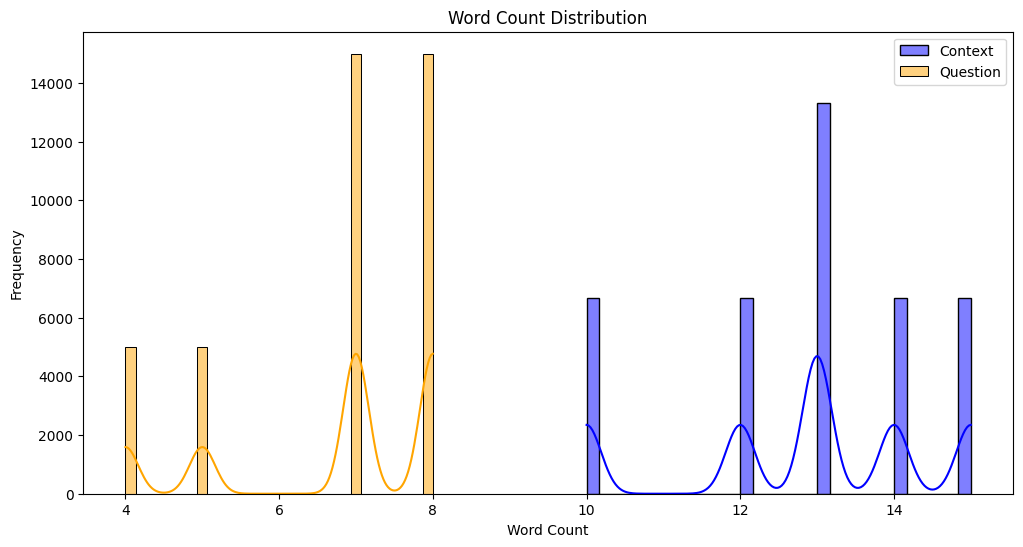

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Word count for context and question
data['context_word_count'] = data['cleaned_context'].apply(lambda x: len(x.split()))
data['question_word_count'] = data['cleaned_question'].apply(lambda x: len(x.split()))

# Plot word count distributions
plt.figure(figsize=(12, 6))
sns.histplot(data['context_word_count'], bins=30, kde=True, color='blue', label='Context')
sns.histplot(data['question_word_count'], bins=30, kde=True, color='orange', label='Question')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


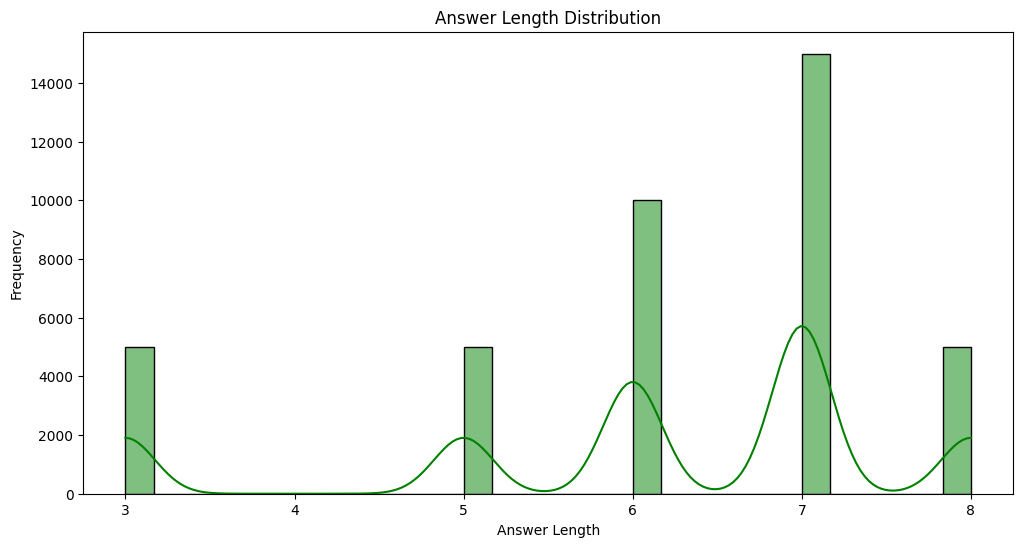

In [71]:
# Answer length
data['answer_length'] = data['cleaned_answer'].apply(lambda x: len(x.split()))

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(data['answer_length'], bins=30, kde=True, color='green')
plt.title('Answer Length Distribution')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.show()


In [72]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_context'])  # Vectorize context (input)
y = data['cleaned_answer']  # Use answer as the target (output)




In [73]:
X_train, X_test, y_train, y_test, context_train, context_test, question_train, question_test = train_test_split(
    X, y, data['cleaned_context'], data['cleaned_question'], test_size=0.2, random_state=42
)

In [74]:



# Step 4: Save the preprocessed data
train_data = pd.DataFrame({
    'context': context_train,
    'question': question_train,
    'answer': y_train
})

test_data = pd.DataFrame({
    'context': context_test,
    'question': question_test,
    'answer': y_test
})


# Check the number of rows after filtering
print(f"Train data size after filtering: {len(train_data)}")
print(f"Test data size after filtering: {len(test_data)}")



Train data size after filtering: 31987
Test data size after filtering: 7997


In [75]:
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
